# Customer Segmentation Using K-Means and DBSCAN (Mall Dataset)

## Step 1: Import Required Libraries
We start by importing essential libraries for data handling (Pandas, NumPy), visualization (Matplotlib, Seaborn), and clustering (KMeans, DBSCAN) from Scikit-learn.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN
import warnings
warnings.filterwarnings('ignore')


## Step 2: Load the Dataset
We upload and load the Mall Customers dataset which contains customer demographics and spending behaviors.

In [40]:

df = pd.read_csv('Mall_Customers (1).csv')  # Adjust path if needed


In [41]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [42]:
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


## Step 3: Data Exploration and Cleaning
We check the dataset's structure, summary statistics, and null values. We also select only the numeric columns (Annual Income and Spending Score) for clustering.

In [43]:
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [44]:
# 2. Clean Gender column
print("Gender unique:", df['Gender'].unique())
df['Gender'] = df['Gender'].astype(str).str.strip().str.capitalize()
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Gender'].fillna(-1, inplace=True)

Gender unique: ['Male' 'Female']


In [45]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [46]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


## Step 4: Feature Scaling
Clustering algorithms are sensitive to scale. So, we standardize the features using StandardScaler.

In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [48]:
X_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

## Step 5; Annual income vs spending score — 
which is great for visualizing customer distribution.



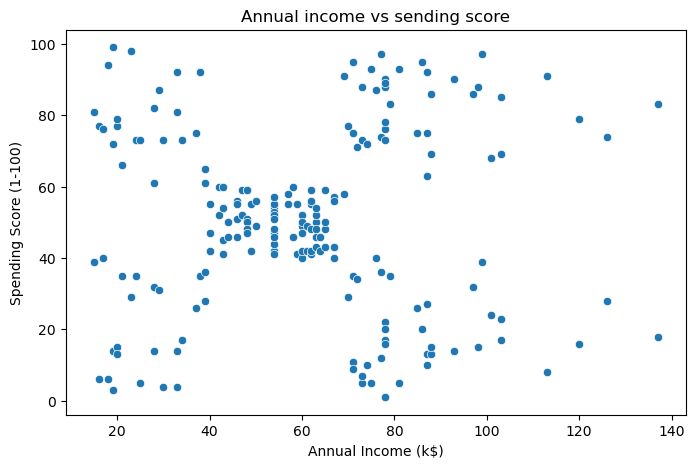

In [55]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'])
plt.title("Annual income vs sending score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()


## Step 6: Determine Optimal Number of Clusters (Elbow Method)

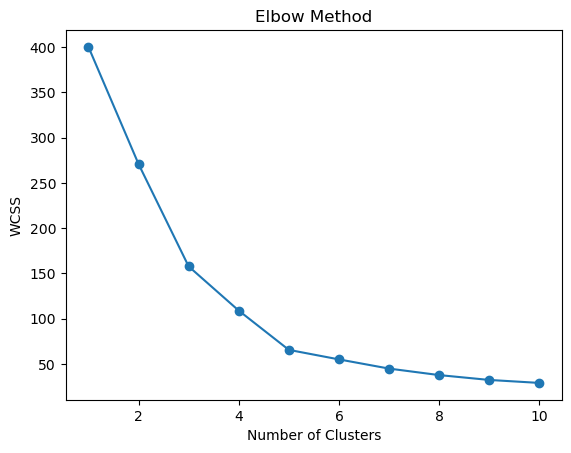

In [50]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


## Step 7: Apply K-Means Clustering
We apply the K-Means algorithm with the chosen number of clusters (e.g., 5) and assign cluster labels to each customer.

In [51]:
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


## Step 8: Visualize the Clusters


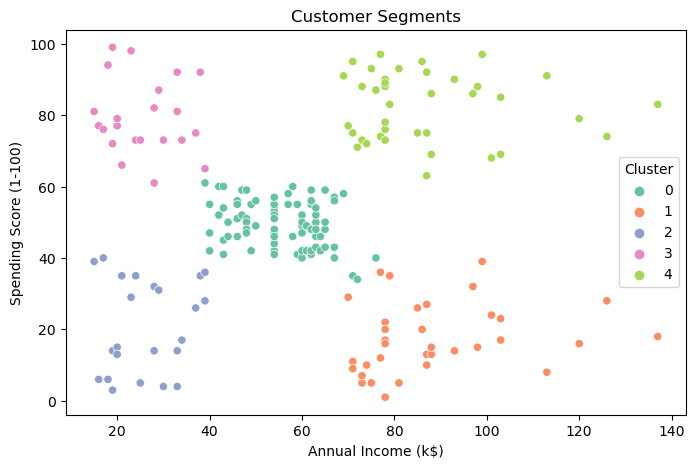

In [52]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2')
plt.title("Customer Segments")
plt.show()


# Bonus: Try DBSCAN Clustering

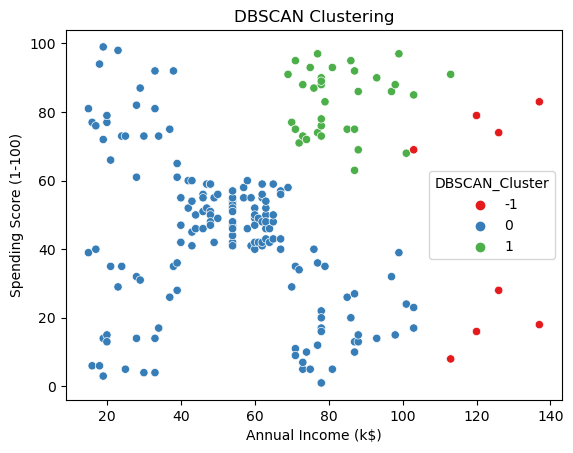

In [53]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', palette='Set1')
plt.title("DBSCAN Clustering")
plt.show()


## Step 9: Analyze Average Income and Spending by Cluster

In [54]:
avg_spending = df.groupby('Cluster')['Spending Score (1-100)'].mean()
print(avg_spending)


Cluster
0    49.518519
1    17.114286
2    20.913043
3    79.363636
4    82.128205
Name: Spending Score (1-100), dtype: float64
